In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\Projects\RA\Mini Project\customer personality\marketing_campaign_data.csv')
pd.set_option('display.max_columns', None)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## EDA & Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.loc[(df.ID.duplicated())==True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df = df[(~df.Income.isnull())]

In [7]:
df['Dt_Data_Collected'] = '30-09-2022'
df['Dt_Data_Collected'] = pd.to_datetime(df['Dt_Data_Collected'])
df['Age'] = df['Dt_Data_Collected'].dt.year - df['Year_Birth']

bins = [25, 34, 44, 54, 64, max(df['Age'])]
group_names = ['Adult', 'Late Adult', 'Mature', 'Senior', 'Late Senior']
df['Age_Group'] = pd.cut(df['Age'], bins, labels=group_names)

bins = [1893, 1964, 1980, 1996]
group_names = ['Boomers', 'Gen X', 'Millennials']
df['Gen_Group'] = pd.cut(df['Year_Birth'], bins, labels=group_names)

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['DaysAsCustomer'] = df['Dt_Data_Collected'] - df['Dt_Customer']
df['DaysAsCustomer'] = df['DaysAsCustomer'].dt.days

df['NumChildren'] = df['Kidhome'] + df['Teenhome']
df['NumAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Total_Spending'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

def division(x, y):
    if y==0 :
        return 0
    return round(x/y, 1)

df['Conversion_Rate'] = df.apply(lambda k: division(k['NumAcceptedCmp'], k['NumWebVisitsMonth']), axis=1)

In [8]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Data_Collected,Age,Age_Group,Gen_Group,DaysAsCustomer,NumChildren,NumAcceptedCmp,Total_Purchases,Total_Spending,Conversion_Rate
659,6940,1966,S3,Lajang,46734000.0,1,2,2013-10-21,86,100000,1000,39000,6000,1000,76000,4,3,2,3,6,1,0,0,0,0,0,3,11,0,2022-09-30,56,Senior,Gen X,3266,3,1,12,223000,0.2
2117,8659,1952,S3,Bertunangan,69805000.0,0,1,2014-01-21,50,750000,71000,174000,13000,10000,20000,2,6,8,11,2,0,0,0,0,0,0,3,11,0,2022-09-30,70,Late Senior,Boomers,3174,1,0,27,1038000,0.0
1144,819,1945,S1,Janda,63285000.0,0,0,2013-05-11,84,508000,124000,249000,50000,38000,134000,1,6,5,13,3,0,0,0,0,0,0,3,11,0,2022-09-30,77,Late Senior,Boomers,3429,0,0,25,1103000,0.0
864,4120,1975,D3,Lajang,49514000.0,1,0,2013-12-17,61,88000,39000,78000,58000,13000,93000,2,6,1,4,7,0,0,0,0,0,0,3,11,0,2022-09-30,47,Mature,Gen X,3209,1,0,13,369000,0.0
1683,7788,1983,S3,Menikah,23536000.0,1,0,2014-04-06,53,6000,0,3000,0,0,1000,1,0,0,3,3,0,0,0,0,0,0,3,11,0,2022-09-30,39,Late Adult,Millennials,3099,1,0,4,10000,0.0


In [9]:
df.drop(['ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Data_Collected'], axis=1, inplace=True)

In [10]:
df.to_csv('D:\Projects\RA\Mini Project\customer personality\marketing_campaign_data_modified.csv', index=False)

### Descriptive Statistics

In [11]:
num_cols = df.select_dtypes(include = 'number').columns
cat_cols = df.select_dtypes(include = ['object','category']).columns

df[cat_cols].describe().T

,count,unique,top,freq
Education,2216,5,S1,1116
Marital_Status,2216,6,Menikah,857
Age_Group,2216,5,Mature,725
Gen_Group,2215,3,Gen X,1061


In [12]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.0,51381500.0,68522000.0,666666000.0
Kidhome,2216.0,4.417870e-01,5.368962e-01,0.0,0.0,0.0,1.0,2.0
Teenhome,2216.0,5.054152e-01,5.441812e-01,0.0,0.0,0.0,1.0,2.0
Recency,2216.0,4.901264e+01,2.894835e+01,0.0,24.0,49.0,74.0,99.0
MntCoke,2216.0,3.050916e+05,3.373279e+05,0.0,24000.0,174500.0,505000.0,1493000.0
MntFruits,2216.0,2.635605e+04,3.979392e+04,0.0,2000.0,8000.0,33000.0,199000.0
MntMeatProducts,2216.0,1.669959e+05,2.242833e+05,0.0,16000.0,68000.0,232250.0,1725000.0
MntFishProducts,2216.0,3.763764e+04,5.475208e+04,0.0,3000.0,12000.0,50000.0,259000.0
MntSweetProducts,2216.0,2.702888e+04,4.107205e+04,0.0,1000.0,8000.0,33000.0,262000.0
MntGoldProds,2216.0,4.396525e+04,5.181541e+04,0.0,9000.0,24500.0,56000.0,321000.0


### Individual Distribution Plot

In [13]:
num_cols = ['Income', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Age', 'DaysAsCustomer', 'Total_Purchases', 'Total_Spending',
       'Conversion_Rate']
len(num_cols)

18

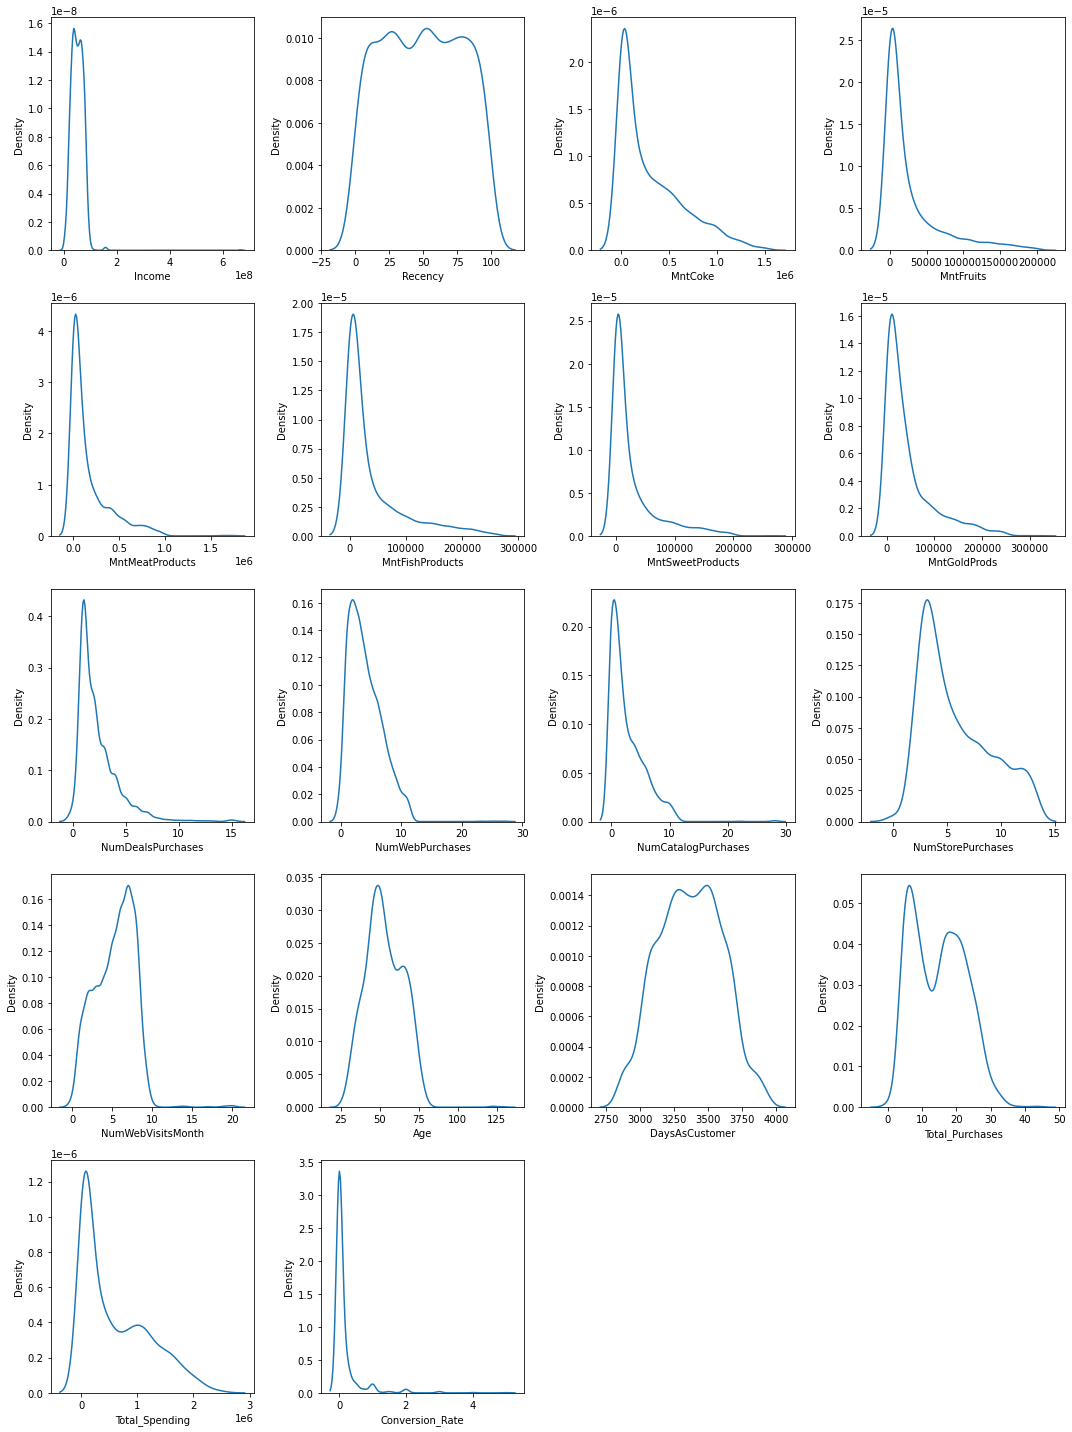

In [14]:
plt.figure(figsize=(15, 20))
for i in range(len(num_cols)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(df[num_cols[i]])
    plt.tight_layout()

### Individual Boxplot

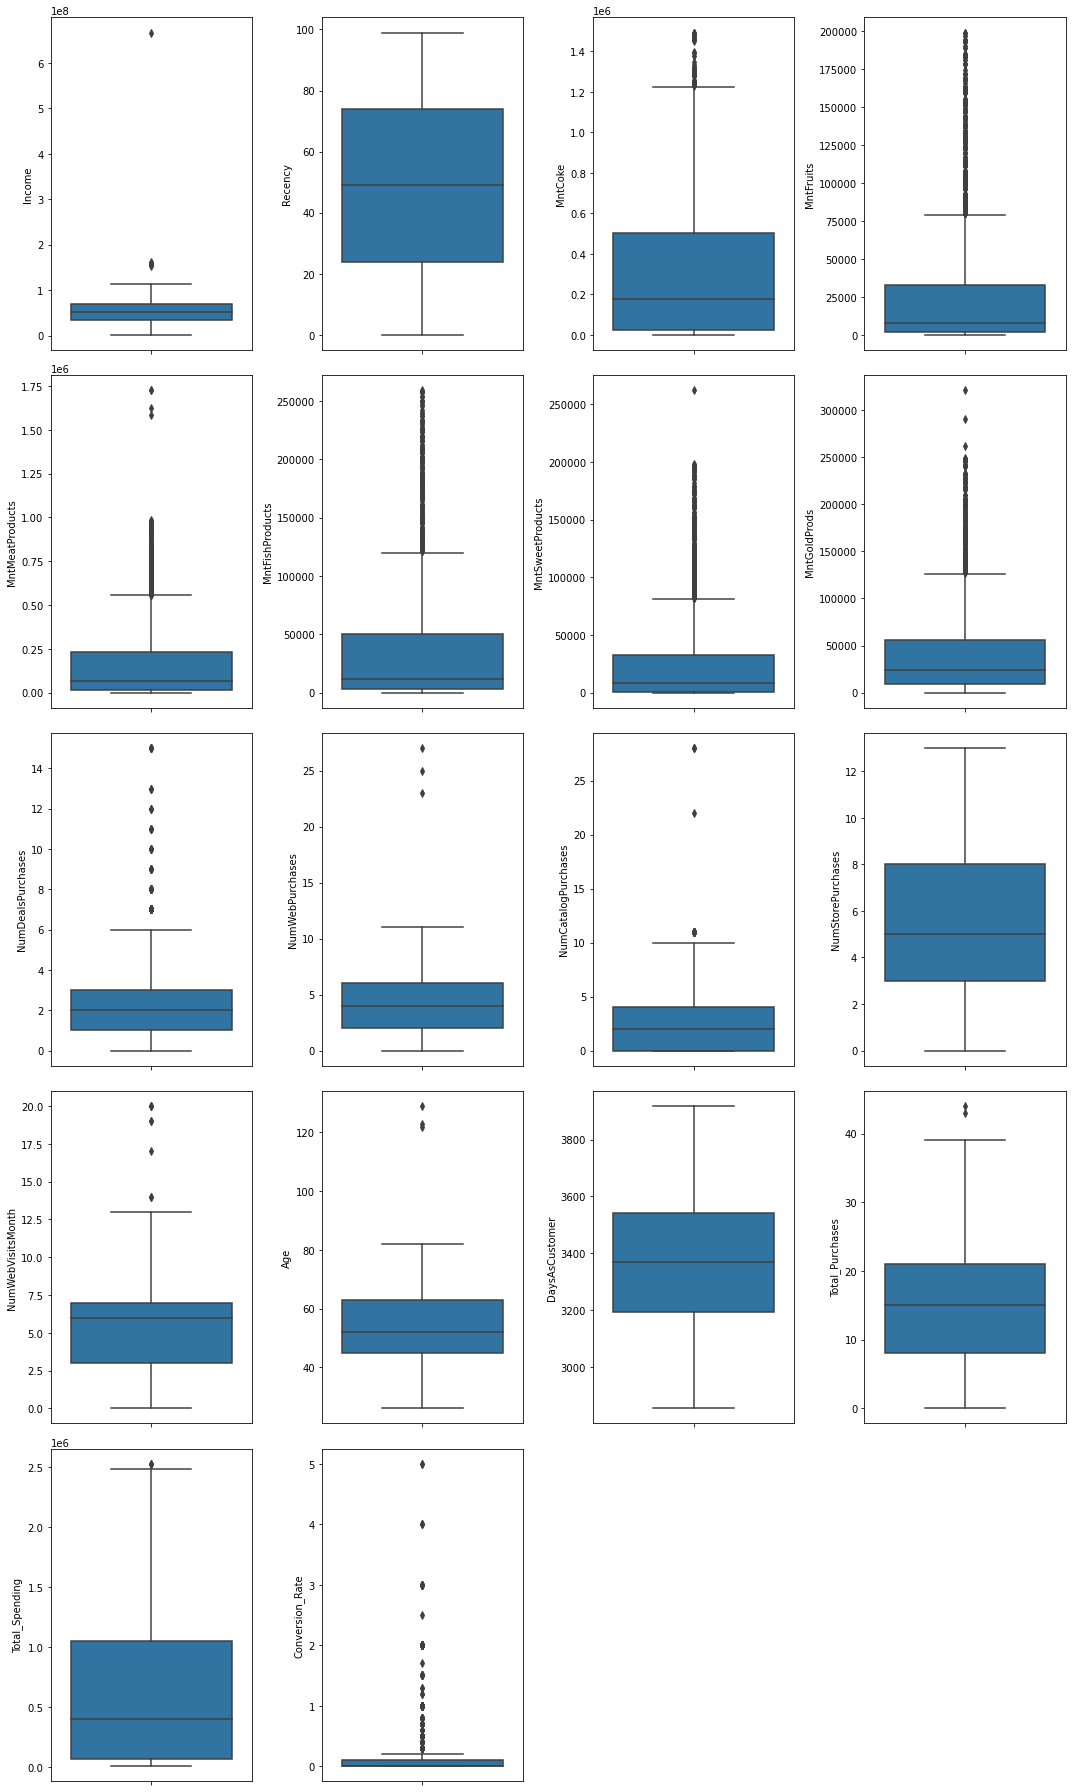

In [15]:
plt.figure(figsize=(15, 25))
for i in range(len(num_cols)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[num_cols[i]])
    plt.tight_layout()

### Individual Countplot

In [16]:
cols = ['Kidhome', 'Teenhome', 
        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 
       'NumChildren', 'NumAcceptedCmp']
cols.extend(cat_cols)
len(cols)

15

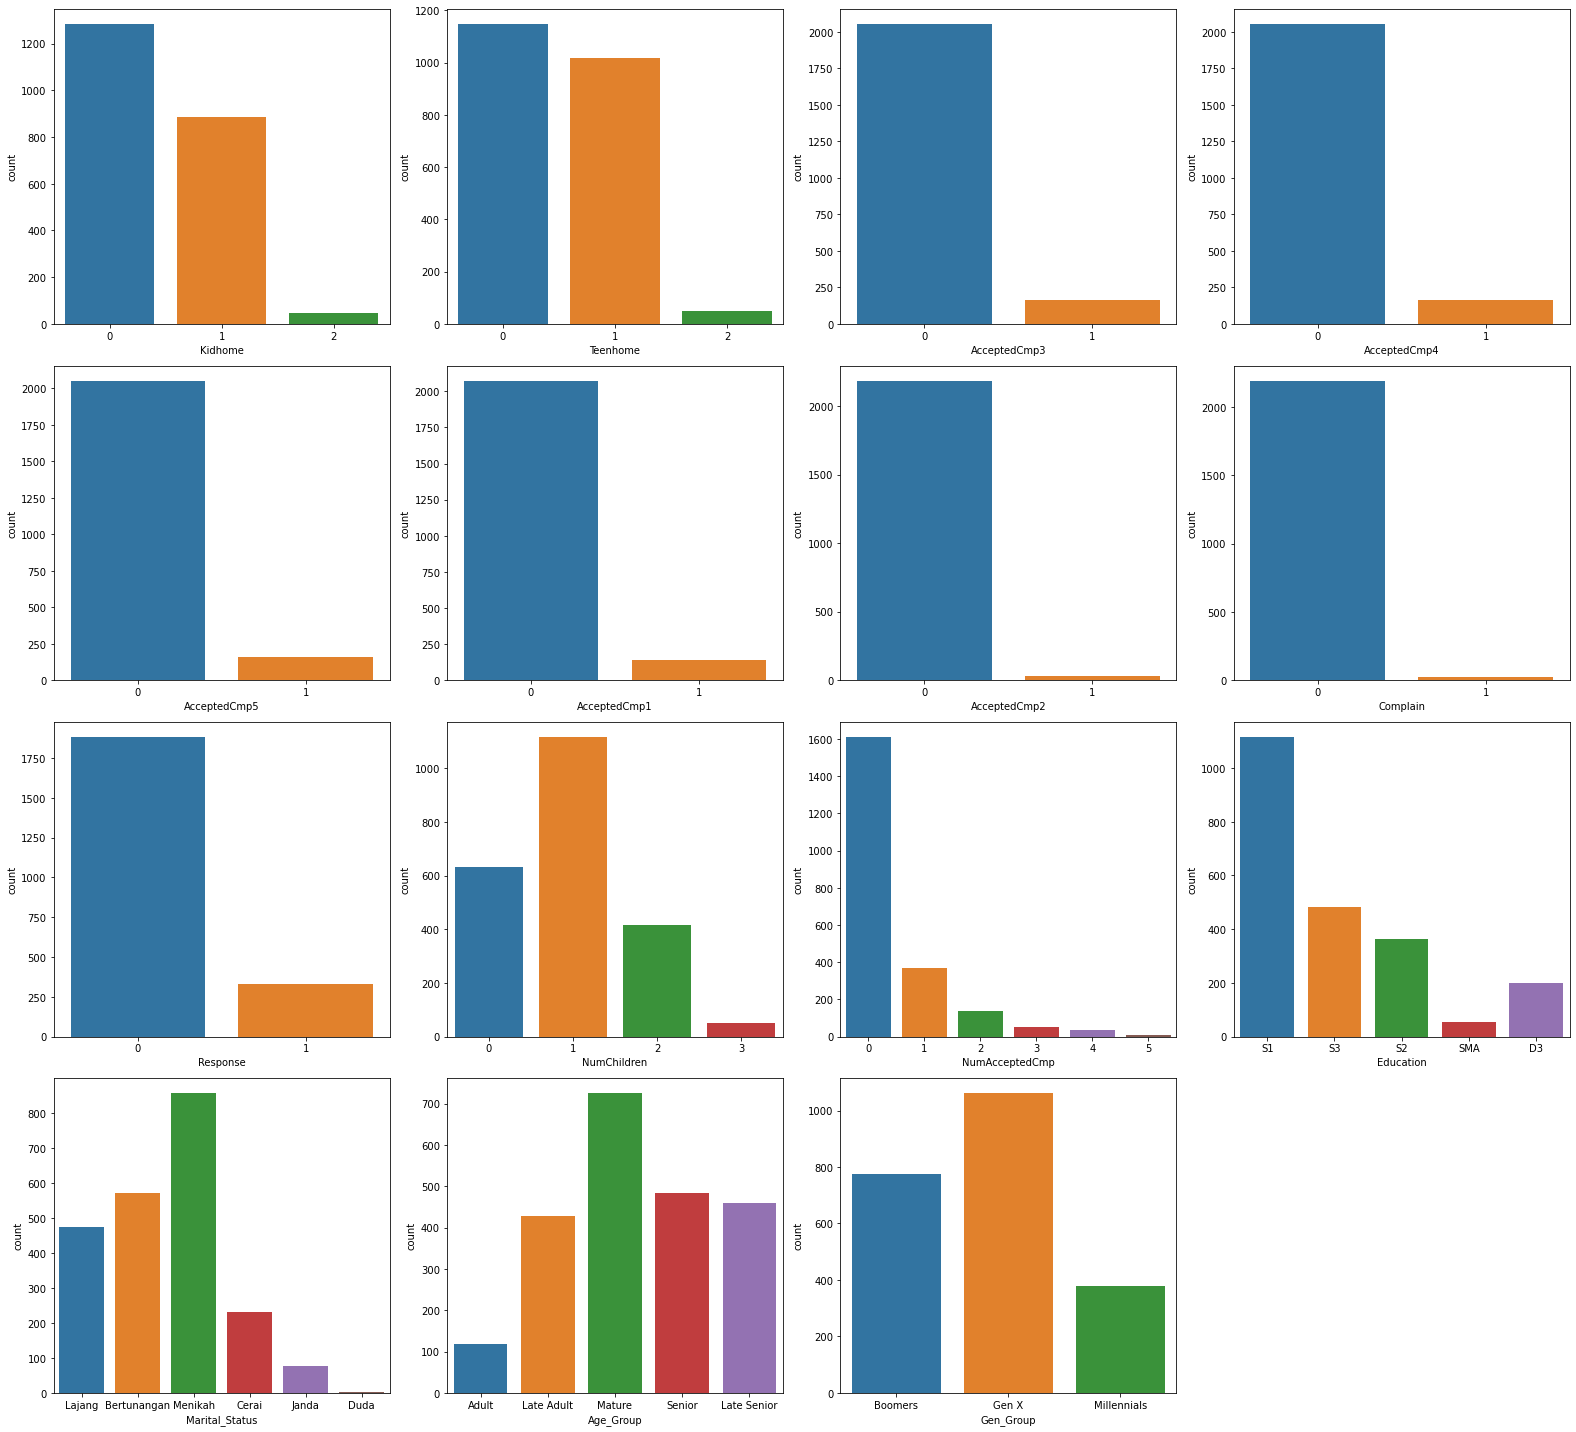

In [17]:
plt.figure(figsize=(22, 20))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.countplot(df[cols[i]])
    plt.tight_layout()

### Correlation

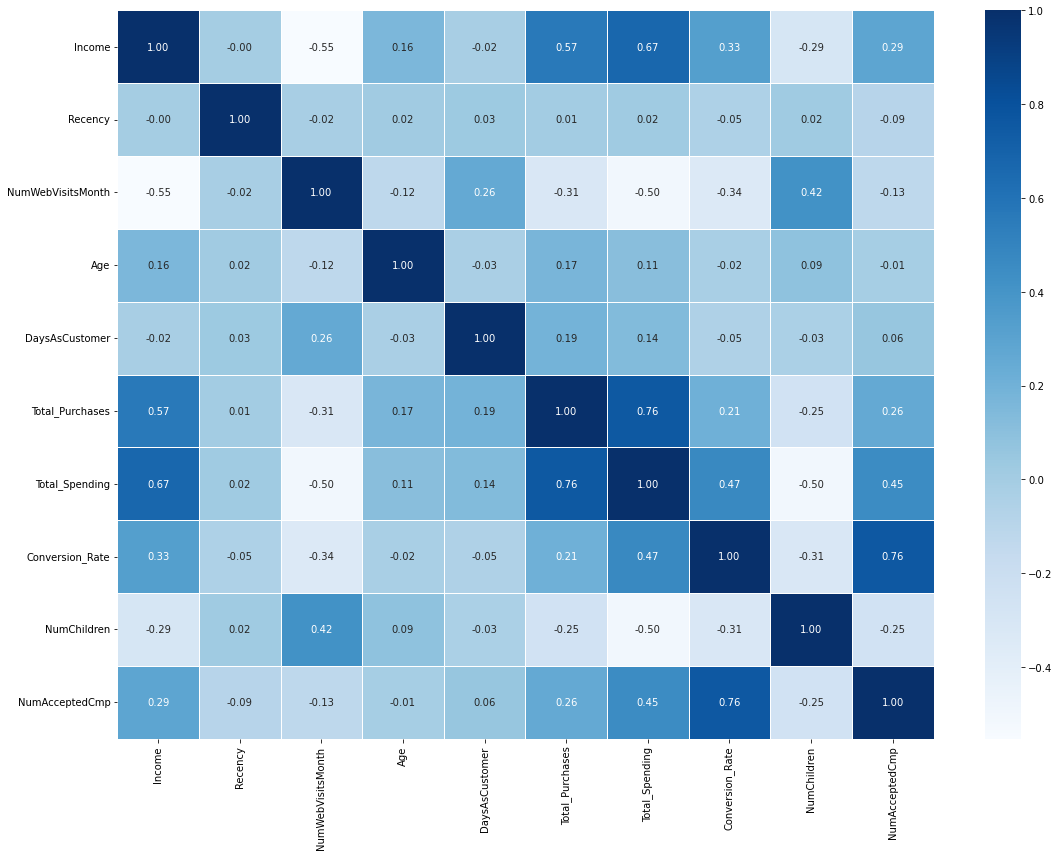

In [18]:
plt.figure(figsize=(16, 12))
num_cols = ['Income', 'Recency', 'NumWebVisitsMonth',
       'Age', 'DaysAsCustomer', 'Total_Purchases', 'Total_Spending',
       'Conversion_Rate', 'NumChildren', 'NumAcceptedCmp']
sns.heatmap(df[num_cols].corr(), cmap='Blues', annot=True, fmt='.2f', linewidth=1)
plt.tight_layout()
plt.show()

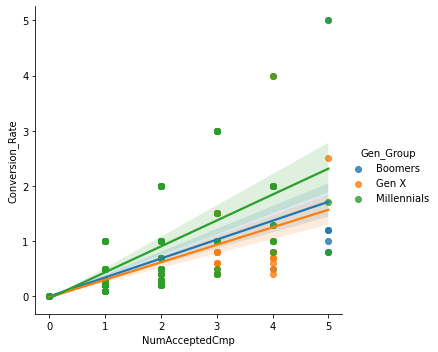

In [19]:
ax = sns.lmplot(x="NumAcceptedCmp", y="Conversion_Rate", data=df, hue='Gen_Group')

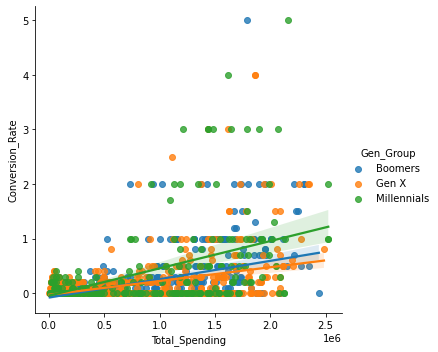

In [20]:
ax = sns.lmplot(x="Total_Spending", y="Conversion_Rate", data=df, hue='Gen_Group')

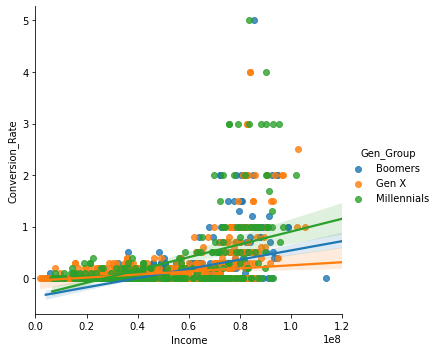

In [21]:
ax = sns.lmplot(x="Income", y="Conversion_Rate", data=df, hue='Gen_Group')
ax.set(xlim=(0, 120000000))

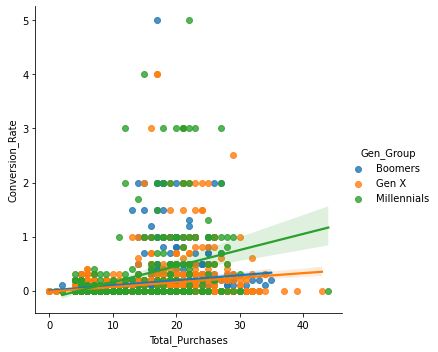

In [22]:
ax = sns.lmplot(x="Total_Purchases", y="Conversion_Rate", data=df, hue='Gen_Group')

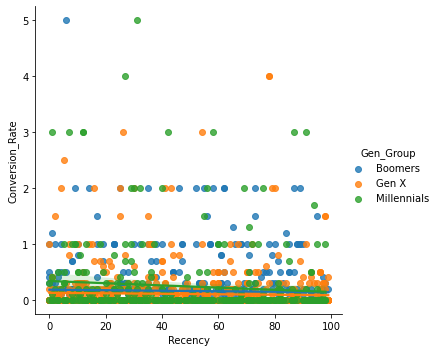

In [23]:
ax = sns.lmplot(x="Recency", y="Conversion_Rate", data=df, hue='Gen_Group')

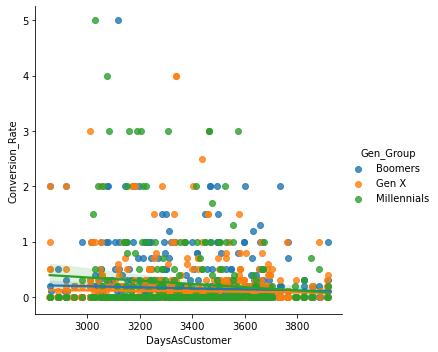

In [108]:
ax = sns.lmplot(x="DaysAsCustomer", y="Conversion_Rate", data=df, hue='Gen_Group')

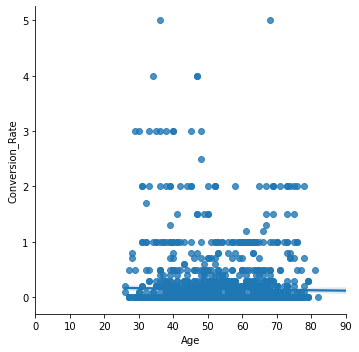

In [97]:
ax = sns.lmplot(x="Age", y="Conversion_Rate", data=df)
ax.set(xlim=(0, 90))

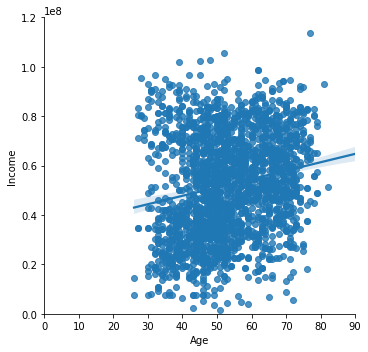

In [98]:
ax = sns.lmplot(x="Age", y="Income", data=df)
ax.set(ylim=(0, 120000000))
ax.set(xlim=(0, 90))

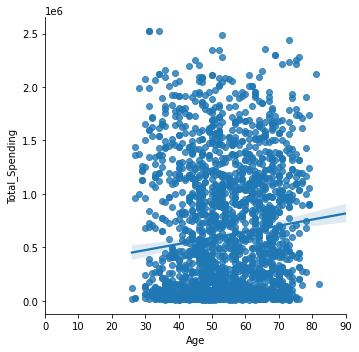

In [99]:
ax = sns.lmplot(x="Age", y="Total_Spending", data=df)
ax.set(xlim=(0, 90))

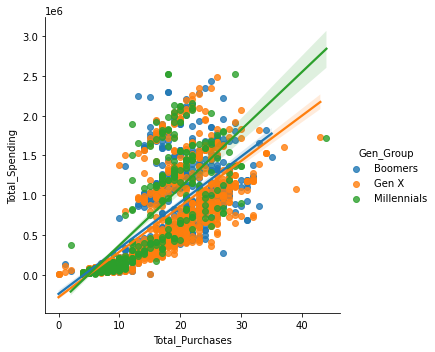

In [17]:
ax = sns.lmplot(y="Total_Spending", x="Total_Purchases", data=df, hue='Gen_Group')
plt.savefig('purchase_spending.png')

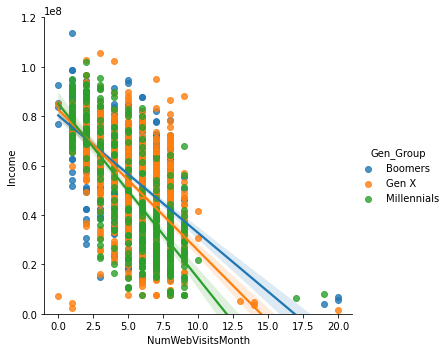

In [13]:
ax = sns.lmplot(y="Income", x="NumWebVisitsMonth", data=df, hue='Gen_Group')
ax.set(ylim=(0, 120000000))
plt.savefig('income_visit.png')

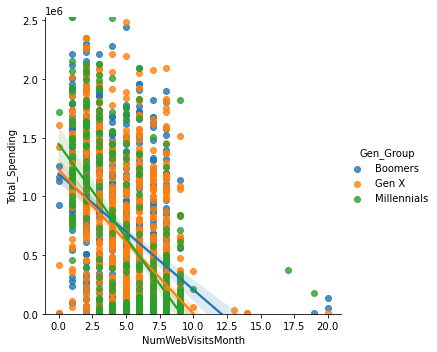

In [14]:
ax = sns.lmplot(y="Total_Spending", x="NumWebVisitsMonth", data=df, hue='Gen_Group')
ax.set(ylim=(0, max(df['Total_Spending'])))
plt.savefig('spending_visit.png')

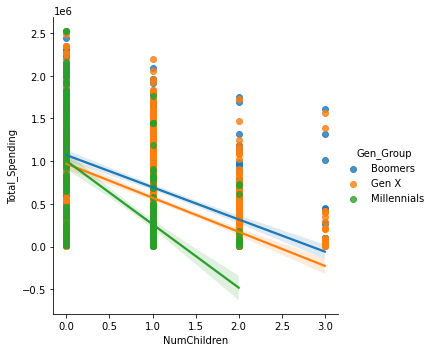

In [15]:
ax = sns.lmplot(y="Total_Spending", x="NumChildren", data=df, hue='Gen_Group')
#ax.set(ylim=(0, max(df['Total_Spending'])))
plt.savefig('children_spending.png')

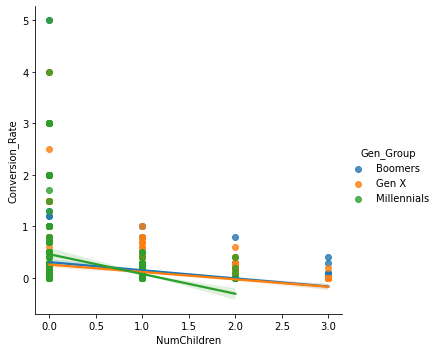

In [24]:
ax = sns.lmplot(y="Conversion_Rate", x="NumChildren", data=df, hue='Gen_Group')